# Arnoldi Iteration

In [1]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as pt

Let us make a matrix with a defined set of eigenvalues and eigenvectors, given by `eigvals` and `eigvecs`.

In [2]:
np.random.seed(40)

# Generate matrix with eigenvalues 1...25
n = 25
eigvals = np.linspace(1., n, n)
eigvecs = np.random.randn(n, n)
print(eigvals)

A = la.solve(eigvecs, np.dot(np.diag(eigvals), eigvecs))
print(la.eig(A)[0])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
[25. 24. 23.  1.  2.  3. 22.  4. 21. 20.  5.  6.  7. 19. 18.  8.  9. 17.
 16. 10. 11. 12. 15. 14. 13.]


## Initialization

Set up $Q$ and $H$:

In [3]:
Q = np.zeros((n, n))
H = np.zeros((n, n))

k = 0

Pick a starting vector, normalize it

In [4]:
x0 = np.random.randn(n)
x0 = x0/la.norm(x0)

# Poke it into the first column of Q
Q[:, k] = x0

del x0

Make a list to save arrays of Ritz values:

In [5]:
ritz_values = []

## Algorithm

Carry out one iteration of Arnoldi iteration.

Run this cell in-place (Ctrl-Enter) until H is filled.

24


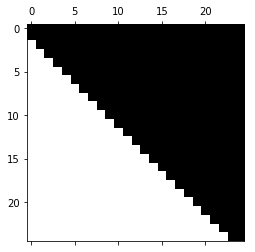

In [30]:
print(k)

u = A @ Q[:, k]

# Carry out Gram-Schmidt on u against Q
for j in range(k+1):
    qj = Q[:, j]
    H[j,k] = qj @ u
    u = u - H[j,k]*qj

if k+1 < n:
    H[k+1, k] = la.norm(u)
    Q[:, k+1] = u/H[k+1, k]

k += 1

pt.spy(H)

ritz_values.append(la.eig(H)[0])

Check that $Q^T A Q =H$:

In [31]:
la.norm(Q.T @ A @ Q - H)/ la.norm(A)

5.694093461629727e-08

Check that Q is orthogonal:

In [32]:
la.norm(Q.T @ Q - np.eye(n))

9.785682262092261e-08

## Plot convergence of Ritz values

Enable the Ritz value collection above to make this work.

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


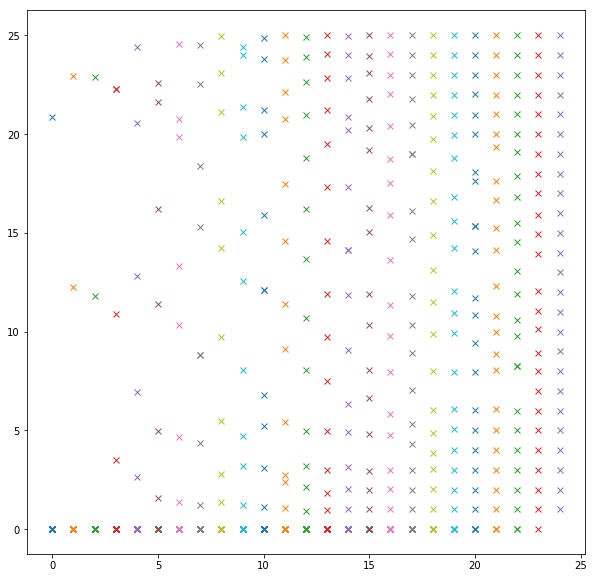

In [36]:
pt.figure(figsize=(10,10))
for i, rv in enumerate(ritz_values):
    pt.plot([i] * len(rv), rv, "x")

In [37]:
A = np.random.rand(2,2) + 1j*np.random.rand(2,2)
print(A)


[[0.23814271+0.34399174j 0.69827952+0.84920957j]
 [0.82652298+0.93565511j 0.72234023+0.35809612j]]


In [38]:
A.conj()

array([[0.23814271-0.34399174j, 0.69827952-0.84920957j],
       [0.82652298-0.93565511j, 0.72234023-0.35809612j]])

In [39]:
A.conj().T

array([[0.23814271-0.34399174j, 0.82652298-0.93565511j],
       [0.69827952-0.84920957j, 0.72234023-0.35809612j]])

In [40]:
import scipy.linalg as sla

In [44]:
sla.